Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [27]:
number_of_points = 1000
x_point = []
y_point = []

In [28]:
a = 0.22
b = 0.78

In [29]:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = (a*x+b)+np.random.normal(0.0,0.1)
    x_point.append(x)
    y_point.append(y)

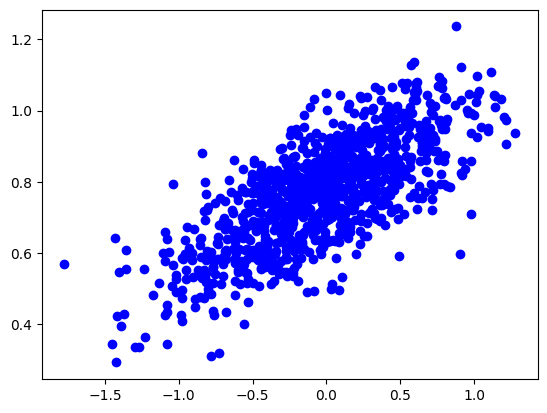

In [30]:
plt.scatter(x_point,y_point,c='b')
plt.show()

In [31]:
real_x = np.array(x_point)
real_y = np.array(y_point)

**Batch Stochastic Gradient Descent** - wykorzystujemy **cały zbiór danych**

Definicja błędu:

In [32]:
def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

In [33]:
import random

In [34]:
Loss = []
epochs = 50
learning_rate = 0.5

a = tf.Variable(random.random())
b = tf.Variable(random.random())

for _ in range(epochs):

  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())
    grad_a, grad_b = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*grad_a)
  b.assign_sub(learning_rate*grad_b)

In [35]:
np.max(Loss),np.min(Loss)

(0.31212983, 0.010254185)

In [36]:
print(a.numpy())
print(b.numpy())

0.21805292
0.7771721


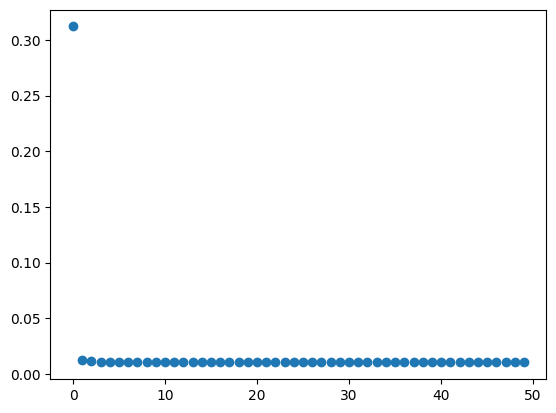

In [37]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

In [38]:
max = np.max(x_point)
min = np.min(x_point)

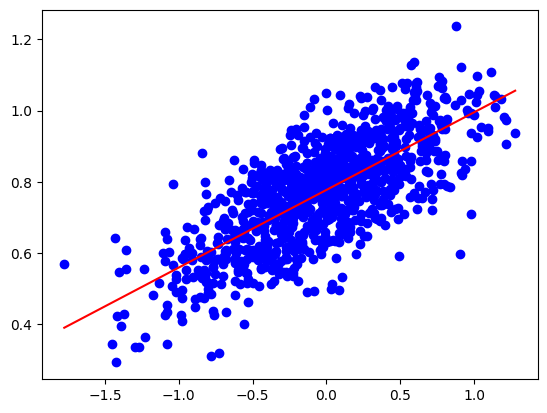

In [39]:
X = np.linspace(min, max, num=10)
plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(x_point,y_point,c="b")
plt.show()

**Mini-batch Stochastic Gradient Descent** - wykorzystujemy **część zbióru danych**

In [40]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
np.random.shuffle(arr)
arr

array([2, 8, 0, 1, 7, 4, 5, 6, 3, 9])

In [42]:
def subset_dataset(x_dataset, y_dataset, subset_size):
    arr = np.arange(len(x_dataset))
    np.random.shuffle(arr)
    x_train = x_dataset[arr[0:subset_size]]
    y_train = y_dataset[arr[0:subset_size]]
    return x_train,y_train

In [43]:
print(subset_dataset(real_x, real_y, 10))

(array([ 0.35025452,  0.64406881, -0.14883337,  0.18102791, -0.45199893,
       -0.44150576, -0.85036368,  0.19784847,  0.45256794, -0.37263313]), array([0.92233515, 0.92313667, 0.7416204 , 0.78208195, 0.82514087,
       0.83270043, 0.64120408, 0.92022443, 0.92671379, 0.59391998]))


TODO:

In [62]:
def mini_batch_stochastic_gradient_descent(batch_size):
  Loss = []
  epochs = 1000
  learning_rate = 0.2
  batch_size = batch_size     #wielkość zbioru wykorzystanego do treningu

  a = tf.Variable(random.random())
  b = tf.Variable(random.random())

  for i in range(epochs):

    real_x_batch, real_y_batch = subset_dataset(real_x,real_y,batch_size)

    with tf.GradientTape() as tape:
      pred_y = a * real_x_batch + b
      loss = loss_fn(real_y_batch, pred_y)
      Loss.append(loss.numpy())

    dloss_da, dloss_db = tape.gradient(loss,(a, b))

    a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
    b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db
  print("last one loss", str(loss))

  plt.scatter(np.arange(epochs),Loss)
  plt.show()
  max = np.max(x_point)
  min = np.min(x_point)
  X = np.linspace(min, max, num=10)
  plt.plot(X,a.numpy()*X+b.numpy(),c='r')
  plt.scatter(x_point,y_point,c="b")
  plt.show()



Wykres zmian błędu:

last one loss tf.Tensor(3.4965207e-05, shape=(), dtype=float32)


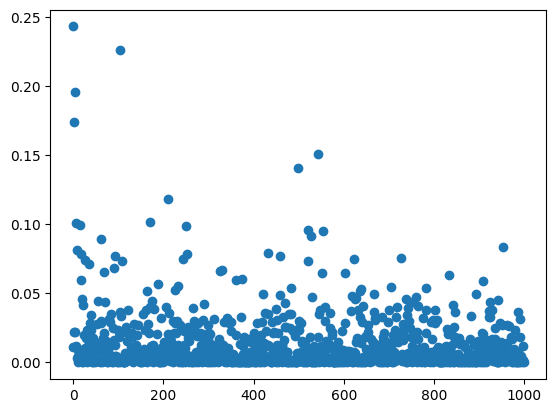

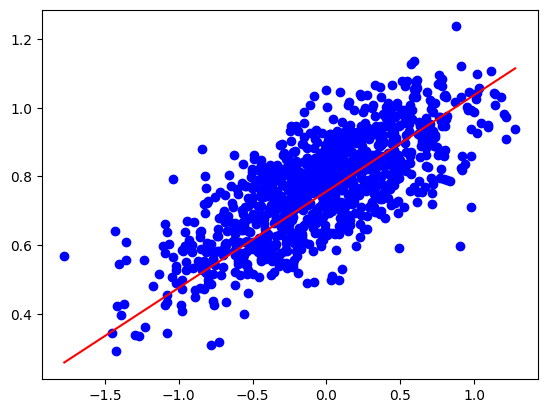

In [63]:
mini_batch_stochastic_gradient_descent(1)

last one loss tf.Tensor(0.011782203, shape=(), dtype=float32)


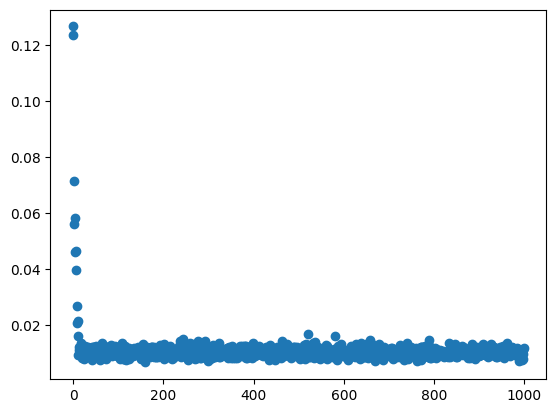

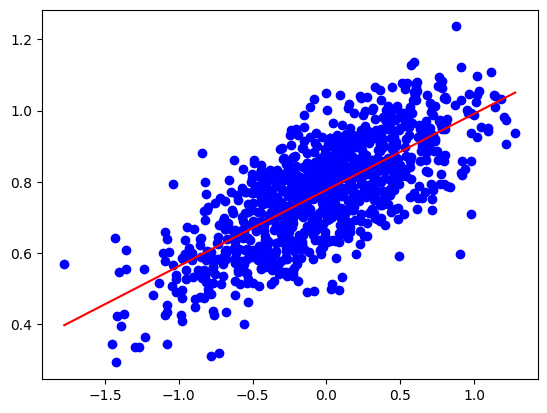

In [66]:
mini_batch_stochastic_gradient_descent(100)

last one loss tf.Tensor(0.010254186, shape=(), dtype=float32)


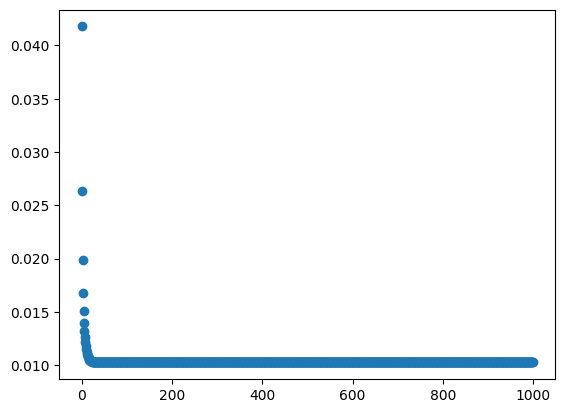

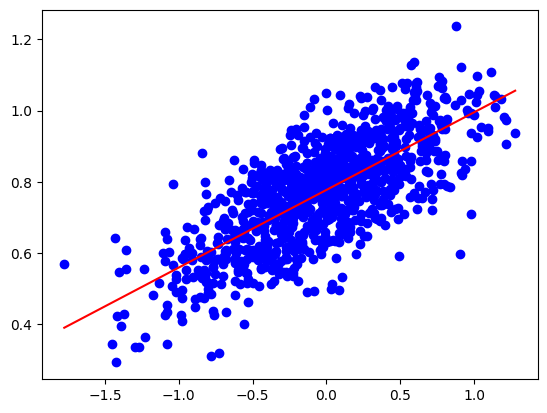

In [65]:
mini_batch_stochastic_gradient_descent(1000)